In [1]:
import matplotlib.pyplot as plt
import torch
import pytorch_measure as pm
import numpy as np
N = 17 # number of weights
M = 1000 # Number of datapoints
verbose = True
dev = 'cpu'

x = torch.linspace(0, 10, M)
data = -2 + x + torch.randn(M).to(dev)

w = torch.ones(N,dtype=torch.float).to(dev)
w = torch.nn.parameter.Parameter(w/w.sum())
l = torch.linspace(-6, 2, N, requires_grad=False).to(dev)

def regression_model(a,x):
    return a+x

index = []
for i in range(M):
    ab = (regression_model(l, x[i]) - data[i]).abs()
    index.append(torch.argmin(ab))

def NLLLoss(m:list[pm.Measure]):
    return -m[0].weights[index].log().sum()

sd = (l[index] - data)**2
def WardLoss(w):
    return sum(sd * w[index])

Epoch: 0          Loss: 2629.5969  LR: 0.10000
Epoch: 2          Lr was reduced to: 0.07000
Epoch: 3          Lr was reduced to: 0.04900
Epoch: 4          Lr was reduced to: 0.03430
Epoch: 8          Lr was reduced to: 0.02401
Epoch: 10         Loss: 2246.5740  LR: 0.02401
Epoch: 16         Lr was reduced to: 0.01681
Epoch: 20         Loss: 2165.7664  LR: 0.01681
Epoch: 25         Lr was reduced to: 0.01176
Epoch: 28         Lr was reduced to: 0.00824
Epoch: 30         Loss: 2141.6040  LR: 0.00824
Epoch: 32         Lr was reduced to: 0.00576
Epoch: 36         Lr was reduced to: 0.00404
Epoch: 38         Lr was reduced to: 0.00282
Epoch: 40         Lr was reduced to: 0.00198
Epoch: 45         Lr was reduced to: 0.00138
Epoch: 46         Lr was reduced to: 0.00097
Epoch: 50         Loss: 2135.1025  LR: 0.00097
Epoch: 60         Loss: 2134.5786  LR: 0.00097
Epoch: 64         Lr was reduced to: 0.00068
Epoch: 65         Lr was reduced to: 0.00047
Epoch: 70         Loss: 2134.4246  LR: 0.00

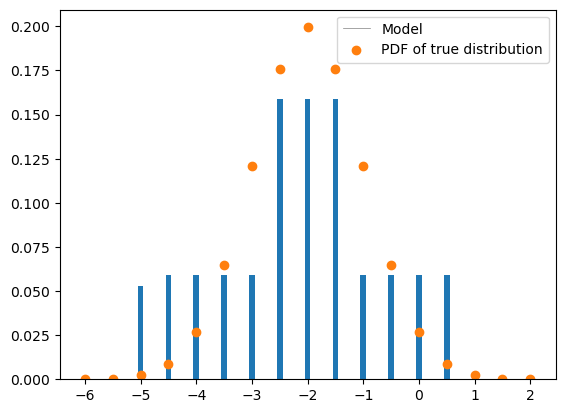

In [2]:
measure = pm.Measure(locations=l, weights=w, device=dev)
opt = pm.Optimizer([measure], lr=1e-1)
opt.minimize(NLLLoss, verbose=True, print_freq=10, max_epochs=1000, tol_const=1e-2)

plt.plot()

mu=0 #Create true values
sigma=1
xs = l.detach()
y=1/(np.sqrt(2*np.pi)*sigma)*torch.exp(-(xs+2-mu)**2/(2*sigma**2))
y/=sum(y) #Normalize

measure.visualize()
plt.scatter(xs, y, zorder=2)
plt.legend(['Model','PDF of true distribution'])
plt.show()
